In [2]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
with open('./cache/memo_apr10_zipf_num_heads_8_num_layers_12_resample/memo_apr10_zipf_num_heads_8_num_layers_12_resample_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1744325270.2539148.pkl', 'rb') as f:
    data = utils.CPU_Unpickler(f).load()



In [7]:
plt.plot([i['train_loss'] for i in data['logs']][:100])
plt.plot([i['train_loss'] for i in data['logs']][100:])

In [12]:
for i in data['logs']:
    if i['test_metrics'] != {}:
        print(i['test_metrics']["logsoftmaxloss"])

# Apr 18

In [106]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
with open('./cache/memo_apr10_zipf_num_heads_24_num_layers_36_resample_lr_1e-4/memo_apr10_zipf_num_heads_24_num_layers_36_resample_lr_1e-4_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1744954785.908804.pkl', 'rb') as f:
    data = utils.CPU_Unpickler(f).load()

In [107]:
loss_per_appearance = [i["loss_per_appearance"] for i in data["logs"]] # list of list of arrays
appearances = [i["appearances"] for i in data["logs"]] # list of list of arrays
time_per_batch = []
for epoch, batch in enumerate(data["logs"]):
    time_per_batch.append([])
    num_batches = len(batch["appearances"])
    for i, batch_id in enumerate(batch["appearances"]):
        time_per_batch[epoch].append(epoch * num_batches + (i) )
        

In [108]:
print("time, appearance, loss", len(time_per_batch[0]), len(appearances[0]), len(loss_per_appearance[0]))
ranks_to_plot = [0, 10, 50, 100, 500, 1000, 5000, 10000, 50000]
rank_times = defaultdict(list)
rank_losses = defaultdict(list)
num_appearances = defaultdict(float)
rank_appearances = defaultdict(list)
# loop through each epoch
for t, a, l in zip(time_per_batch, appearances, loss_per_appearance):
    # loop through each batch
    for i in range(len(t)):
        # loop through each rank
        for rank in range(len(ranks_to_plot)):
            # print("rank", ranks_to_plot[rank], "time", t[i], "loss", l[i][np.where(a[i] == ranks_to_plot[rank])].mean())
            rank_times[ranks_to_plot[rank]].append(t[i])
            rank_losses[ranks_to_plot[rank]].append(l[i][np.where(a[i] == ranks_to_plot[rank])].mean())
            n = np.sum(a[i] == ranks_to_plot[rank])
            if n > 0:
                num_appearances[ranks_to_plot[rank]] += n
            rank_appearances[ranks_to_plot[rank]].append(num_appearances[ranks_to_plot[rank]])
    
    


In [109]:
import matplotlib.colors as mcolors
markers = ["o", "s", "D", "P", "X", "v", "^", "<", ">"]
from matplotlib.colors import Normalize

def numbers_to_viridis_colors(numbers, vmin, vmax):
    """
    Convert a list of real numbers to colors using the viridis colormap.
    
    Args:
        numbers (list or numpy.ndarray): List of real numbers to convert to colors
        
    Returns:
        list: List of RGB colors in the format (r, g, b) where each component is between 0 and 1
    """
    # Convert input to numpy array if it's not already
    numbers = np.array(numbers)
    
    # Create a normalizer to map the numbers to [0, 1] range
    norm = Normalize(vmin=vmin, vmax=vmax)
    
    # Get the viridis colormap
    cmap = plt.cm.viridis
    
    # Convert numbers to colors
    colors = cmap(norm(numbers))
    
    # Return list of RGB colors (excluding alpha channel)
    return colors[:, :3].tolist()
colormin = np.log10(min(np.concatenate(list(rank_appearances.values())))+1)
colormax = np.log10(max(np.concatenate(list(rank_appearances.values())))+1)
print("colormin", colormin, "colormax", colormax)
for i, rank in enumerate(ranks_to_plot):
    # print("rank_appearances",  numbers_to_viridis_colors(np.log(np.array(rank_appearances[rank])+1), colormin, colormax))
    scatter = plt.scatter(rank_times[rank], rank_losses[rank], 
                        #   c=numbers_to_viridis_colors(np.log(np.array(rank_appearances[rank])+1), colormin, colormax),
                        c = np.log10(np.array(rank_appearances[rank])+1),
                          norm = mcolors.Normalize(vmin=colormin, vmax=colormax),
                label=f"rank {rank}", s=2, marker=markers[i])
    
    cb = plt.colorbar()
    plt.legend()
    plt.show()

## Forgetting

In [37]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
# with open('./cache/memo_apr6_zipf_num_heads_8_num_layers_12_forget/memo_apr6_zipf_num_heads_8_num_layers_12_forget_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1745001737.7764006.pkl', 'rb') as f:
with open('./cache/memo_apr6_zipf_num_heads_24_num_layers_36_lr_1e-4_forget/memo_apr6_zipf_num_heads_24_num_layers_36_lr_1e-4_forget_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1745000344.072605.pkl', 'rb') as f:
    data = utils.CPU_Unpickler(f).load()

In [43]:
test_epoch = np.stack([i["test_metrics"]["logsoftmaxloss"] for i in data["logs"]]) # list of list of arrays
print(test_epoch.shape)
for i in [0, 2000, 4000, 6000, 8000, 10000, 12000, 14000]:
    rank0 = (i+300) % 2000
    rank1 = (i+500) % 2000
    spacing = 50
    switch_epoch = (i+20) // 2000
    plt.plot(test_epoch[:,i+rank0], marker="o", markersize=1, linewidth=0.5, label=f"rank {rank0 * spacing}, switch {switch_epoch}")
    plt.plot(test_epoch[:,i+rank1], marker="o", markersize=1, linewidth=0.5, label=f"rank {rank1 * spacing}, switch {switch_epoch}")
plt.title("Forgetting: loss vs. rank \n Model: 24 heads, 36 layers, lr=1e-4")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(loc=(1.1,0))
plt.show()

# May 11

In [3]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
# fname = './cache/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1746418255.6068754/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1746418255.6068754.pkl'
# fname = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1746418285.1167283/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1746418285.1167283.pkl'
fname = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747077824.4925184/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747077824.4925184.pkl'
with open(fname, 
          'rb') as f:
    data = utils.CPU_Unpickler(f).load()
print("args", data["args"])
# plot train loss
fig, axs = plt.subplots(1, 1, figsize=(5, 6))
axs.plot(np.arange(0,len(data["logs"])*1000,1000), [i["train_loss"] for i in data["logs"]])
axs.set_title("Train loss")
axs.set_xlabel("Iteration x 1e5")
axs.set_ylabel("Loss")
axs.set_xticks(np.arange(0,len(data["logs"])*1000,1e5))
axs.set_xticklabels(np.arange(0,len(data["logs"])*1000,1e5)/1e5)
plt.show()


In [4]:
logsoftmaxloss = defaultdict(list)
for l in data["logs"]: 
    logsoftmaxloss_array = l["test_metrics"]["logsoftmaxloss"][:10000:1000]
    logsoftmaxloss["logsoftmaxloss"].extend(logsoftmaxloss_array)
    logsoftmaxloss["epoch"].extend([l["epoch"]*1000] * len(logsoftmaxloss_array))
    logsoftmaxloss["rank"].extend(np.arange(0, len(logsoftmaxloss_array), 1)*10000)
fig, ax = plt.subplots(figsize=(10, 6))
logsoftmaxloss = pd.DataFrame(logsoftmaxloss)
logsoftmaxloss["rank"] = logsoftmaxloss["rank"].astype("category")
sns.lineplot(x="epoch", y="logsoftmaxloss", data=logsoftmaxloss, ax=ax, hue="rank")
plt.legend(loc=(1.1,0))
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.title("Loss vs. rank")
plt.show()













## Analyze unfrozen zero init

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
fname = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747077824.4925184/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747077824.4925184.pkl'
with open(fname, 
          'rb') as f:
    data = utils.CPU_Unpickler(f).load()
    print(data["args"]["is_initialize_attention_weights_to_zero"])
 

In [10]:
# fname = './cache/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1746418255.6068754/memo_may3_zipf_num_heads_8_num_layers_12_zero_all_attn_weights_transformer_K_100000_L_100_hidden_8_nheads_8_nlayers_12_1746418255.6068754.pkl'
# fname = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1746418285.1167283/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_except_cproj_weights_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1746418285.1167283.pkl'
f = './cache/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning/memo_may3_zipf_num_heads_24_num_layers_36_lr_1e-4_zero_all_attn_allow_learning_transformer_K_100000_L_100_hidden_8_nheads_24_nlayers_36_1747196536.2310433/*iter_350*'
for fname in glob.glob(f):
    with open(fname, 'rb') as f:
        data = utils.CPU_Unpickler(f).load()
    for k, v in data.items():
        if "attn" in k:
            print(fname.split("/")[-1], k, v.shape, v.sum())
    break

## One Layer Attention

In [ ]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_may10_zipf_onelayerattention_lr_1e-3_num_hidden_features_8/*'
for f in glob(f):
    subdir = f.split('/')[-1]
    fname = f + '/' + subdir + '.pkl'
    with open(fname, 
            'rb') as f:
        data = utils.CPU_Unpickler(f).load()
    print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    # plot train loss
    fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    num_iters_per_epoch = 1000
    axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    axs.set_title("Train loss")
    axs.set_xlabel("Iteration x 1e5")
    axs.set_ylabel("Loss")
    axs.set_xticks(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10))
    axs.set_xticklabels(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10)/num_iters_per_epoch)
    plt.show()
    logsoftmaxloss = defaultdict(list)
    K = data["args"]["K"]
    for l in data["logs"]: 
        logsoftmaxloss_array = l["test_metrics"]["logsoftmaxloss"][:K:K//30]
        logsoftmaxloss["logsoftmaxloss"].extend(logsoftmaxloss_array)
        logsoftmaxloss["epoch"].extend([l["epoch"]*num_iters_per_epoch] * len(logsoftmaxloss_array))
        logsoftmaxloss["rank"].extend(np.arange(0, len(logsoftmaxloss_array), 1)*(K//30))
    fig, ax = plt.subplots(figsize=(10, 6))
    logsoftmaxloss = pd.DataFrame(logsoftmaxloss)
    logsoftmaxloss["rank"] = logsoftmaxloss["rank"].astype("category")
    sns.lineplot(x="epoch", y="logsoftmaxloss", data=logsoftmaxloss, ax=ax, hue="rank")
    plt.legend(loc=(1.1,0))
    plt.xlabel("Iteration")
    plt.ylabel("Loss")
    plt.title("Loss vs. rank")
    plt.show()


In [ ]:
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_may10_zipf_onelayerattention_lr_1e-3_num_hidden_features_8/*'
import gpt 
import importlib
importlib.reload(gpt)
def plot_attn_weights(attn_weights, rank):
    fig, axs = plt.subplots(4, 5, figsize=(20, 10))
    for i in range(4):
        for j in range(5):
            # axs[i, j].imshow(attn_weights[0,i*5+j].detach().cpu().numpy())
            axs[i, j].set_title(f"Head {i*5+j}")
            axs[i, j].plot(attn_weights[rank,i*5+j,10].detach().cpu().numpy().flatten(), label="pos=10")
            axs[i, j].plot(attn_weights[rank,i*5+j,50].detach().cpu().numpy().flatten(), label="pos=50")
            axs[i, j].plot(attn_weights[rank,i*5+j,99].detach().cpu().numpy().flatten(), label="pos=99")
    axs[i, j].legend()
    fig.suptitle(f"Attention weights at different positions for rank 0")
    # axs[i, j].hist(attn_weights[0,i*5+j].detach().cpu().numpy().flatten())
    # print(attn_weights[0,i*5+j].mean)
    plt.show()
for f in glob(f):
    subdir = f.split('/')[-1]
    fname = f + '/' + subdir + '_model_iter_350.pkl'
    record_fname = f + '/' + subdir + '.pkl'
    data_fname = f + '/' + subdir + '_all_sequences.pkl'
    with open(fname, 
            'rb') as f:
        weights = utils.CPU_Unpickler(f).load()
    
    with open(record_fname, 
            'rb') as f:
        record = utils.CPU_Unpickler(f).load()
    with open(data_fname, 
            'rb') as f:
        data = utils.CPU_Unpickler(f).load()
    print("weights", weights.keys())
    print("data", data.keys(), [len(f) for f in data["sequences"]])
    model = gpt.OneLayerAttention(record["args"]["len_context"], 
                                  record["args"]["num_heads"], 
                                  record["args"]["num_hidden_features"], 
                                  record["args"]["vocab_size"], 
                                  record["args"]["num_mlp_layers"]) 
    model.load_state_dict(weights)
    model.eval()
    output = model(data["sequences"][0], None)
    print("output", output.shape)
    # accuracy between output[:,:-1,:] and data["sequences"][1:], element-wise
    accuracy = (output[:,:-1,:].argmax(dim=-1) == data["sequences"][0][:,1:]).float().mean()
    print("accuracy", accuracy)
    
    attn, attn_weights = model.get_attention_weights(data["sequences"][0], None)
    print("attn", attn.shape, "attn_weights", attn_weights.shape)
    attn = attn.permute(0, 2, 1, 3) # B, T, H, D
    # attn is a tensor of shape (B=Batch size, T=Sequence length, H=Number of heads, D=Number of features)
    # For each head, we want a plot where
    # x-axis is the position in the sequence (i.e. T)
    # y-axis is the difference in norm between attn[0,x,h,:] and attn[0,-1,h,:]
    # i.e. the norm of the difference between the last position and every other position
    # since we want to see whether all heads converge to the same attention weights
    # Do this in a vectorized way without for loops
    
    # Get the last position's attention for each head
    last_pos_attn = attn[0, -1, :, :].unsqueeze(0)  # Shape: (1, H, D)
    
    # Calculate the difference between each position and the last position for all heads
    diff = attn[0, :, :, :] - last_pos_attn  # Shape: (T, H, D)
    
    # Calculate the norm of the difference for each position and head
    diff_norm = torch.norm(diff, dim=2)  # Shape: (T, H)
    
    # Create a plot for each head
    fig, axs = plt.subplots(4, 5, figsize=(20, 10))
    positions = torch.arange(attn.shape[1])
    
    for h in range(attn.shape[2]):  # For each head
        i, j = h // 5, h % 5
        axs[i, j].plot(positions.cpu().numpy(), diff_norm[:, h].detach().cpu().numpy())
        axs[i, j].set_title(f"Head {h}")
        axs[i, j].set_xlabel("Position")
        axs[i, j].set_ylabel("Norm of difference")
    
    plt.tight_layout()
    plt.show()
    
    
    break


# May 26

In [1]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_may26_zipf_onelayerattention_lr_1e-3_vary_num_hidden_features_num_heads/*'
df = defaultdict(list)
for folder in glob(f):
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        
    except Exception as e:
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    # plot train loss
    # fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    # num_iters_per_epoch = 1000
    # axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    model = data["model"]
    
    
    num_heads = data["args"]["num_heads"]
    num_hidden_features = data["args"]["num_hidden_features"]   
    print("model", data["args"]["lr"], num_heads, num_hidden_features, np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
    
    # axs.set_title(f"Train loss: {num_heads} heads, {num_hidden_features} hidden features")
    # axs.set_xlabel("Iteration x 1e5")
    # axs.set_ylabel("Loss")
    # axs.set_xticks(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10))
    # axs.set_xticklabels(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10)/num_iters_per_epoch)
    # plt.show()
    logsoftmaxloss = defaultdict(list)
    K = data["args"]["K"]
    pre_switch_last_log = len(data["logs"]) // 2 - 1 
    post_switch_last_log = len(data["logs"]) - 1 
    last_log = data["logs"][-1]
    last_accuracy = last_log["test_metrics"]["accuracy"][:10000].mean()
    # print(last_log["test_metrics"]["accuracy"][9990:10010])
    df["num_heads"].append(num_heads)
    df["num_hidden_features"].append(num_hidden_features)
    df["last_accuracy"].append(last_accuracy)
    df["last_train_loss"].append(last_log["train_loss"])
    df["pre_switch_last_accuracy"].append(data["logs"][pre_switch_last_log]["test_metrics"]["accuracy"][:10000].mean())
    df["pre_switch_last_train_loss"].append(data["logs"][pre_switch_last_log]["train_loss"]) 
    df["num_params"].append(np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
    df["learning_rate"].append(data["args"]["lr"])
    # spacing = 10
    # df_num_appearances = defaultdict(list)
    # print(len(data["logs"]))
    # for log_id, l in enumerate(data["logs"]): 
    #     logsoftmaxloss_array = l["test_metrics"]["logsoftmaxloss"]
    #     num_appearances = l["num_apppearances"]
    #     accuracy = l["test_metrics"]["accuracy"]
    #     for rank in [0, 1, 5, 50, 500, 5000]:
    #         df_num_appearances[f"rank"].append(rank)
    #         df_num_appearances[f"rank_loss"].append(logsoftmaxloss_array[rank*spacing].mean())
    #         df_num_appearances[f"rank_accuracy"].append(accuracy[rank*spacing])
    #         df_num_appearances["num_appearances"].append(num_appearances[rank*spacing])
    #         if log_id <= pre_switch_last_log:
    #             df_num_appearances[f"switch_epoch"].append("preswitch")
    #         else:
    #             df_num_appearances[f"switch_epoch"].append("postswitch")
    # df_num_appearances = pd.DataFrame(df_num_appearances)
    # # display(df_num_appearances)
    # xax, yax = 2, 3
    # fig, axs = plt.subplots(xax, yax, figsize=(12, 6))
    # for idx, rank in enumerate([0, 1, 5, 50, 500, 5000]):
    #     df_group = df_num_appearances[df_num_appearances["rank"] == rank]
    #     sns.lineplot(x="num_appearances", y="rank_loss", hue="switch_epoch", data=df_group, ax=axs[idx//yax, idx%yax])
    #     axs[idx//yax, idx%yax].set_title(f"Rank {rank*spacing}")
    #     axs[idx//yax, idx%yax].set_xlabel("Number of appearances")
    #     axs[idx//yax, idx%yax].set_xscale("log")
    #     axs[idx//yax, idx%yax].set_ylabel("Loss")
    #     axs[idx//yax, idx%yax].set_ylim(0, 0.8)
    # plt.title(f"Loss vs. number of appearances for num_heads={num_heads}, num_hidden_features={num_hidden_features}")
    # plt.show()
    #     accuracy = l["test_metrics"]["accuracy"] 
    #     print("accuracy", accuracy.shape)
    #     logsoftmaxloss["logsoftmaxloss"].extend(logsoftmaxloss_array)
    #     logsoftmaxloss["epoch"].extend([l["epoch"]*num_iters_per_epoch] * len(logsoftmaxloss_array))
    #     logsoftmaxloss["rank"].extend(np.arange(0, len(logsoftmaxloss_array), 1)*(K//30))
    # fig, ax = plt.subplots(figsize=(10, 6))
    # logsoftmaxloss = pd.DataFrame(logsoftmaxloss)
    # logsoftmaxloss["rank"] = logsoftmaxloss["rank"].astype("category")
    # sns.lineplot(x="epoch", y="logsoftmaxloss", data=logsoftmaxloss, ax=ax, hue="rank")
    # plt.legend(loc=(1.1,0))
    # plt.xlabel("Iteration")
    # plt.ylabel("Loss")
    # plt.title("Loss vs. rank")
    # plt.show()

/tmp/ipykernel_30504/3083583841.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


model 0.001 14 1 9284
model 0.001 2 512 16904194
model 0.001 22 32 30847874
model 0.001 18 1 18020
model 0.001 18 32 17344514
model 0.001 22 2 119594
model 0.001 10 8 203042
model 0.001 6 16 205922
model 0.001 22 4 471594
model 0.001 10 16 815842
model 0.001 14 64 34656386
model 0.001 2 1 260
model 0.001 14 8 518338
model 0.001 10 2 13922
model 0.001 22 64 125136002
model 0.001 14 16 2090594
model 0.001 18 4 265322
model 0.001 2 8 4450
model 0.001 14 4 130538
model 0.001 2 32 56834
model 0.001 22 1 31220
model 0.001 6 256 59186690
model 0.001 10 128 55887362
model 0.001 2 256 3995138
model 0.001 2 2 594
model 0.001 10 4 51882
model 0.001 22 16 7617634
model 0.001 14 32 8496770
model 0.001 6 64 3441794
model 0.001 14 128 141568002
model 0.001 6 8 52226
model 0.001 18 2 67826
model 0.001 14 256 578575874
model 0.001 18 64 70521986
model 0.001 2 1 260
model 0.001 18 16 4275938
model 0.001 14 2 33882
model 0.001 18 8 1059554
model 0.001 10 32 3321602
model 0.001 6 32 835970
model 0.001 2 1

In [4]:
glob('./cache/memo_may26_zipf_onelayerattention_lr_1e-*_vary_num_hidden_features_num_heads/*')

['./cache/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads_transformer_K_100000_L_100_hidden_512_nheads_6_nlayers_4_1748585954.1651747',
 './cache/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads_transformer_K_100000_L_100_hidden_128_nheads_10_nlayers_4_1748585952.3700109',
 './cache/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads_transformer_K_100000_L_100_hidden_8_nheads_2_nlayers_4_1748585967.7586486',
 './cache/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads/memo_may26_zipf_onelayerattention_lr_1e-4_vary_num_hidden_features_num_heads_transformer_K_100000_L_100_hidden_512_nheads_2_nlayers_4_1748585952.0899765',
 './cache/memo_may26_zipf_onelaye

In [3]:
# group df by number of heads and number of hidden features
_df = pd.DataFrame(df)
df_grouped = _df.groupby(["num_heads", "num_hidden_features"])

# take the model with the highest last accuracy for each pair of num_heads and num_hidden_features
df_grouped = df_grouped.apply(lambda x: x.loc[x["last_accuracy"].idxmax()])
display(df_grouped)
# convert df_grouped to a pandas dataframe
df_grouped = df_grouped.reset_index()
display(df_grouped)
# plot last accuracy vs. num params
sns.lineplot(x="num_params", y="last_accuracy", data=df_grouped, hue="num_heads")
plt.title("Last accuracy vs. num params")
plt.xscale("log")
plt.show()
# plot last train loss vs. num params
sns.lineplot(x="num_params", y="last_train_loss", data=df_grouped, hue="num_heads")
plt.title("Last train loss vs. num params")
plt.xscale("log")
plt.show()

/tmp/ipykernel_18190/3765049164.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_grouped = df_grouped.apply(lambda x: x.loc[x["last_accuracy"].idxmax()])


num_heads  num_hidden_features  last_accuracy  \
num_heads num_hidden_features                                                  
2         1                          2.0                  1.0       0.500459   
          2                          2.0                  2.0       0.499712   
          4                          2.0                  4.0       0.500935   
          8                          2.0                  8.0       0.500592   
          16                         2.0                 16.0       0.502143   
          32                         2.0                 32.0       0.505313   
          64                         2.0                 64.0       0.520612   
          128                        2.0                128.0       0.560286   
          256                        2.0                256.0       0.642305   
          512                        2.0                512.0       0.777920   
6         1                          6.0                  1.0       0.500277   
          2                          6.0                  2.0       0.501191   
          4                          6.0                  4.0       0.501777   
          8                          6.0                  8.0       0.506486   
          16                         6.0                 16.0       0.523372   
          32                         6.0                 32.0       0.556299   
          64                         6.0                 64.0       0.634609   
          128                        6.0                128.0       0.760983   
          256                        6.0                256.0       0.806536   
          512                        6.0                512.0       0.779964   
10        1                         10.0                  1.0       0.500661   
          2                         10.0                  2.0       0.501565   
          4                         10.0                  4.0       0.505904   
          8                         10.0                  8.0       0.519617   
          16                        10.0                 16.0       0.556579   
          32                        10.0                 32.0       0.642150   
          64                        10.0                 64.0       0.760904   
          128                       10.0                128.0       0.799451   
          256                       10.0                256.0       0.773513   
14        1                         14.0                  1.0       0.502476   
          2                         14.0                  2.0       0.503945   
          4                         14.0                  4.0       0.511633   
          8                         14.0                  8.0       0.535936   
          16                        14.0                 16.0       0.609105   
          32                        14.0                 32.0       0.734720   
          64                        14.0                 64.0       0.807649   
          128                       14.0                128.0       0.813824   
          256                       14.0                256.0       0.500499   
18        1                         18.0                  1.0       0.502685   
          2                         18.0                  2.0       0.506207   
          4                         18.0                  4.0       0.521366   
          8                         18.0                  8.0       0.566556   
          16                        18.0                 16.0       0.675321   
          32                        18.0                 32.0       0.796571   
          64                        18.0                 64.0       0.719573   
          128                       18.0                128.0       0.567973   
22        1                         22.0                  1.0       0.502190   
          2                         22.0                  2.0       0.507057   
          4                    

ValueError: cannot insert num_hidden_features, already exists

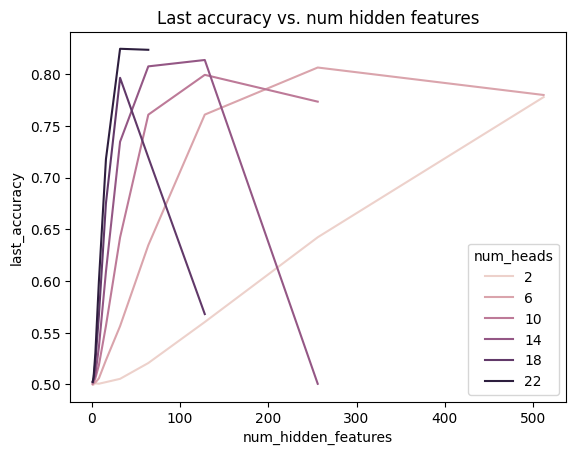

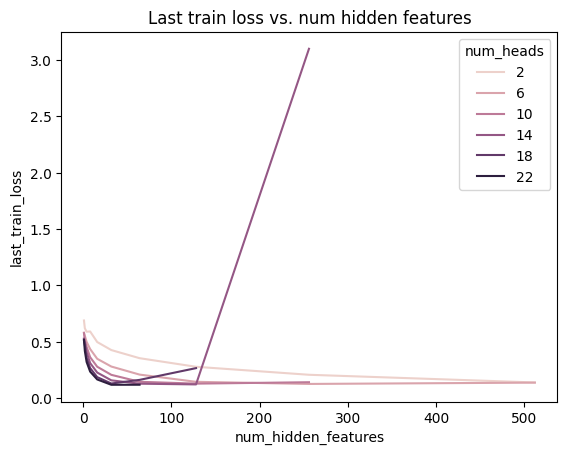

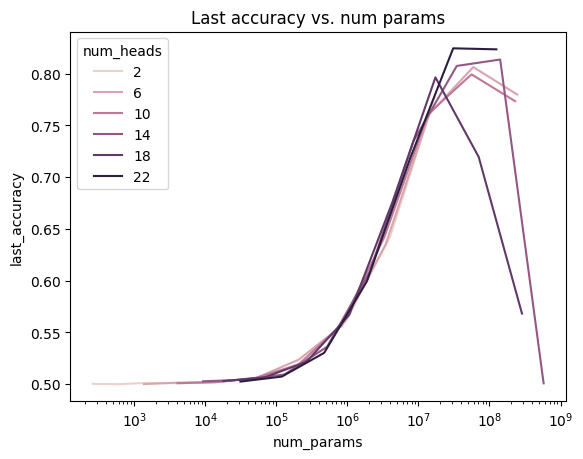

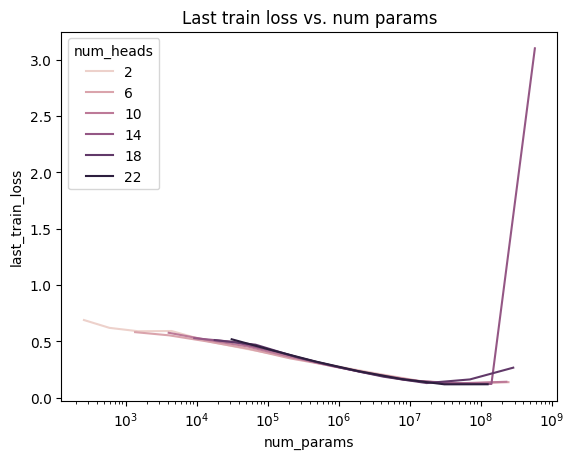

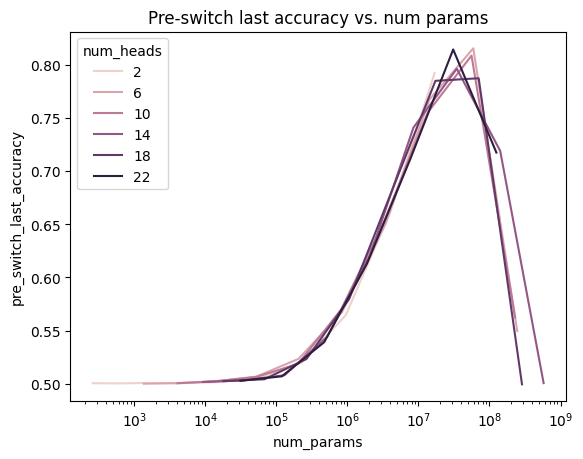

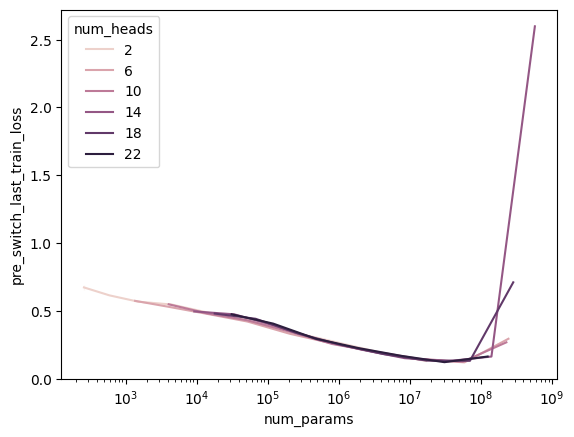

In [2]:
sns.lineplot(x="num_hidden_features", y="last_accuracy", data=df, hue="num_heads")
plt.title("Last accuracy vs. num hidden features")
plt.show()
sns.lineplot(x="num_hidden_features", y="last_train_loss", data=df, hue="num_heads")
plt.title("Last train loss vs. num hidden features")
plt.show()
sns.lineplot(x="num_params", y="last_accuracy", data=df, hue="num_heads")
plt.title("Last accuracy vs. num params")
plt.xscale("log")
plt.show()
sns.lineplot(x="num_params", y="last_train_loss", data=df, hue="num_heads")
plt.title("Last train loss vs. num params")
plt.xscale("log")
plt.show()
sns.lineplot(x="num_params", y="pre_switch_last_accuracy", data=df, hue="num_heads")
plt.title("Pre-switch last accuracy vs. num params")
plt.xscale("log")
plt.show()
sns.lineplot(x="num_params", y="pre_switch_last_train_loss", data=df, hue="num_heads")
plt.xscale("log")
plt.show()


# June 10

In [11]:
import pickle 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import torch
import torch.nn as nn
import utils
from collections import defaultdict
from glob import glob
import gpt 
# fname = './cache/memo_may10_zipf_onelayerattention_lr_1e-3/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336/memo_may10_zipf_onelayerattention_lr_1e-3_transformer_K_1000_L_100_hidden_8_nheads_20_nlayers_4_1746999806.3694336.pkl' 
f = './cache/memo_may26_zipf_onelayerattention_lr_1e-3_vary_num_hidden_features_num_heads/*'
df = defaultdict(list)
for folder in glob(f):
    
    subdir = folder.split('/')[-1]
    fname = folder + '/' + subdir + '.pkl'
    try:
        with open(fname, 
                'rb') as f:
            data = utils.CPU_Unpickler(f).load()
        
    except Exception as e:
        continue
    # print("args", data["args"]["num_mlp_layers"], [l["train_loss"] for l in data["logs"]])
    # plot train loss
    # fig, axs = plt.subplots(1, 1, figsize=(5, 6))
    # num_iters_per_epoch = 1000
    # axs.plot(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch), [i["train_loss"] for i in data["logs"]])
    model = gpt.OneLayerAttention(data["args"]["len_context"], 
                                  data["args"]["num_heads"], 
                                  data["args"]["num_hidden_features"], 
                                  data["args"]["vocab_size"], 
                                  data["args"]["num_mlp_layers"]) 
    model.load_state_dict(data["model"])
    sequences_fname = folder + '/' + subdir + '_all_sequences.pkl'
    with open(sequences_fname, 'rb') as f:
        sequences = utils.CPU_Unpickler(f).load()
    print("sequences", sequences["sequences"][0].shape)
    batch_size = 256
    # post switch accuracy
    for i_b in range(0, len(sequences["sequences"]), batch_size):
        print("i_b", i_b, "batch_size", batch_size, torch.tensor(np.array(sequences["sequences"][i_b:i_b+batch_size])).shape)
        output = model(torch.tensor(np.array(sequences["sequences"][1][i_b:i_b+batch_size])), None)
        print("output", output.shape)
        # accuracy between output[:,:-1,:] and data["sequences"][1:], element-wise
        accuracy = (output[:,:-1,:].argmax(dim=-1) == sequences["sequences"][0][:,1:]).float().mean()
        print("accuracy", accuracy)
    w
    
    num_heads = data["args"]["num_heads"]
    num_hidden_features = data["args"]["num_hidden_features"]   
    print("model", data["args"]["lr"], num_heads, num_hidden_features, np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
    
    # axs.set_title(f"Train loss: {num_heads} heads, {num_hidden_features} hidden features")
    # axs.set_xlabel("Iteration x 1e5")
    # axs.set_ylabel("Loss")
    # axs.set_xticks(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10))
    # axs.set_xticklabels(np.arange(0,len(data["logs"])*num_iters_per_epoch,num_iters_per_epoch*10)/num_iters_per_epoch)
    # plt.show()
    logsoftmaxloss = defaultdict(list)
    K = data["args"]["K"]
    pre_switch_last_log = len(data["logs"]) // 2 - 1 
    post_switch_last_log = len(data["logs"]) - 1 
    last_log = data["logs"][-1]
    last_accuracy = last_log["test_metrics"]["accuracy"][:10000].mean()
    # print(last_log["test_metrics"]["accuracy"][9990:10010])
    df["num_heads"].append(num_heads)
    df["num_hidden_features"].append(num_hidden_features)
    df["last_accuracy"].append(last_accuracy)
    df["last_train_loss"].append(last_log["train_loss"])
    df["pre_switch_last_accuracy"].append(data["logs"][pre_switch_last_log]["test_metrics"]["accuracy"][:10000].mean())
    df["pre_switch_last_train_loss"].append(data["logs"][pre_switch_last_log]["train_loss"]) 
    df["num_params"].append(np.sum([torch.prod(torch.tensor(v.shape)).item() for k, v in model.items()]))
    df["learning_rate"].append(data["args"]["lr"]) 

sequences torch.Size([100000, 100])
i_b 0 batch_size 256 torch.Size([1, 100000, 100])


IndexError: list index out of range